### Import Library

In [4]:
import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
# from keras import layers, models
from keras.applications import VGG16
from keras import optimizers, initializers, regularizers, metrics
from keras.callbacks import ModelCheckpoint
from keras.utils import load_img, img_to_array, array_to_img
from keras import Input
from glob import glob
from PIL import Image

import matplotlib.pyplot as plt
import numpy as np
import os

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [57]:
#from google.colab import drive
#drive.mount('/content/drive/model')

In [58]:
# %cd "/content"
# # %cd "/content/drive/MyDrive"
# !mkdir image4

### Data Download

In [5]:
!wget https://www.dropbox.com/s/diwzbpumn81dwhd/img4.zip?dl=0

--2023-06-19 09:09:47--  https://www.dropbox.com/s/diwzbpumn81dwhd/img4.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6027:18::a27d:4812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/diwzbpumn81dwhd/img4.zip [following]
--2023-06-19 09:09:47--  https://www.dropbox.com/s/raw/diwzbpumn81dwhd/img4.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc926e5980c605ee0a186dc327e4.dl.dropboxusercontent.com/cd/0/inline/B-Si0R7Omee3Nyf64Q5UNepY2-OPI2eFyUGjTvLKp0JFgcEHrlUpbTw4_KvF5BOsil3VFlpK7ot5pKD8ZmhtWgMeU-2QAdoRhpKEBejc_uJqOVLJxh_sTYycZaAuSql8yxaXVXUf20n5yAhDyZGB9UX7CHGAqqzbfoRCk5weoU-mZw/file# [following]
--2023-06-19 09:09:48--  https://uc926e5980c605ee0a186dc327e4.dl.dropboxusercontent.com/cd/0/inline/B-Si0R7Omee3Nyf64Q5UNepY2-OPI2eFyUGjTvLKp0JFgcEHrlUpbTw4_KvF5BOsil3VFlpK7ot5pKD8Zmht

In [6]:
# !unzip '/content/drive/MyDrive/deeplearning/img3.zip' -d '/content/img'
!unzip '/content/img4.zip?dl=0'

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: img4/val/정상/S027-FM02-027-2022-06-28-000074.jpg  
  inflating: __MACOSX/img4/val/정상/._S027-FM02-027-2022-06-28-000074.jpg  
  inflating: img4/val/정상/S026-FM02-026-2022-06-28-000043.jpg  
  inflating: __MACOSX/img4/val/정상/._S026-FM02-026-2022-06-28-000043.jpg  
  inflating: img4/val/정상/S051-FM03-051-2022-07-05-000049.jpg  
  inflating: __MACOSX/img4/val/정상/._S051-FM03-051-2022-07-05-000049.jpg  
  inflating: img4/val/정상/S009-FM01-009-2022-06-27-000092.jpg  
  inflating: __MACOSX/img4/val/정상/._S009-FM01-009-2022-06-27-000092.jpg  
  inflating: img4/val/정상/S024-FM02-024-2022-06-28-000005.jpg  
  inflating: __MACOSX/img4/val/정상/._S024-FM02-024-2022-06-28-000005.jpg  
  inflating: img4/val/정상/S034-FM02-034-2022-07-09-000016.jpg  
  inflating: __MACOSX/img4/val/정상/._S034-FM02-034-2022-07-09-000016.jpg  
  inflating: img4/val/정상/S010-FM01-010-2022-06-30-000043.jpg  
  inflating: __MACOSX/img4/

### Data preprocessing

In [7]:
IMG_HEIGHT = 224
IMG_WIDTH = 224
batch_size = 32
epochs = 50

In [8]:
import tensorflow as tf
from tensorflow import keras
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                          shear_range = 60,                                                                                                                    # shear_range = 60,
                                                          brightness_range = (0.8,1.2),
                                                          horizontal_flip = True)
img_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [9]:
train_set = train_gen.flow_from_directory(directory="/content/img4/train",
                                        target_size = (IMG_WIDTH,IMG_HEIGHT),
                                        class_mode='categorical',
                                        batch_size = batch_size)
val_set = img_gen.flow_from_directory(directory="/content/img4/val",
                                        target_size = (IMG_WIDTH,IMG_HEIGHT),
                                        class_mode='categorical',
                                        batch_size = batch_size)
test_set = img_gen.flow_from_directory(directory="/content/img4/test",
                                        target_size = (IMG_WIDTH,IMG_HEIGHT),
                                        class_mode='categorical',
                                        batch_size = batch_size)

Found 32855 images belonging to 5 classes.
Found 8268 images belonging to 5 classes.
Found 1670 images belonging to 5 classes.


### Build Model

In [10]:
transfer_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224, 3))
transfer_model.trainable=False
model_tr = Sequential([
    transfer_model,
    Flatten(),
    Dense(64, activation='relu'),
    Dense(5, 'softmax')
])

58889256/58889256 [==============================] - 2s 0us/step


In [11]:
model_tr.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 64)                1605696   
                                                                 
 dense_1 (Dense)             (None, 5)                 325       
                                                                 
Total params: 16,320,709
Trainable params: 1,606,021
Non-trainable params: 14,714,688
_________________________________________________________________


### Train Model

In [12]:
model_tr.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [13]:
history = model_tr.fit(train_set,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=val_set)

Epoch 1/50
1027/1027 [==============================] - 549s 520ms/step - loss: 0.7333 - accuracy: 0.7142 - val_loss: 0.4555 - val_accuracy: 0.8263
Epoch 2/50
1027/1027 [==============================] - 535s 521ms/step - loss: 0.5594 - accuracy: 0.7861 - val_loss: 0.4863 - val_accuracy: 0.8209
Epoch 3/50
1027/1027 [==============================] - 538s 524ms/step - loss: 0.5033 - accuracy: 0.8109 - val_loss: 0.4952 - val_accuracy: 0.8166
Epoch 4/50
1027/1027 [==============================] - 531s 517ms/step - loss: 0.4858 - accuracy: 0.8177 - val_loss: 0.4844 - val_accuracy: 0.8179
Epoch 5/50
1027/1027 [==============================] - 523s 509ms/step - loss: 0.4660 - accuracy: 0.8231 - val_loss: 0.3922 - val_accuracy: 0.8544
Epoch 6/50
1027/1027 [==============================] - 519s 506ms/step - loss: 0.4476 - accuracy: 0.8297 - val_loss: 0.3816 - val_accuracy: 0.8582
Epoch 7/50
1027/1027 [==============================] - 526s 512ms/step - loss: 0.4397 - accuracy: 0.8350 - val_

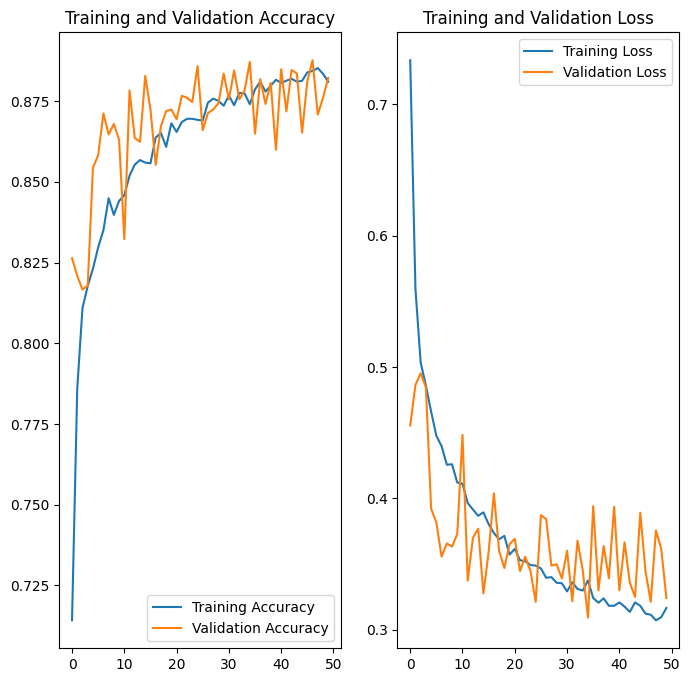

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [32]:
from google.colab import drive
drive.mount('/content/drive/model')

Mounted at /content/drive/model


In [34]:
model_tr.save("/content/drive/MyDrive/model/VGG16_tr_aug.h5")

### Evaluate Model and Confusion matrix

In [18]:
model_tr.evaluate(test_set)

53/53 [==============================] - 7s 124ms/step - loss: 1.1235 - accuracy: 0.6533


[1.1234575510025024, 0.6532934308052063]

In [54]:
images = []
labels = []

def load_image():
  global images, labels
  dir = "/content/img4/test/"
  class_dir = ['노균병','노균병유사','정상','흰가루병','흰가루병유사']
  for index in range(len(class_dir)):
    list_dir = dir+class_dir[index]+"/"
    for j in os.listdir(list_dir):
      if j == ".ipynb_checkpoints":
        continue
      img = load_img(list_dir+j)
      test_array = img_to_array(img)
      test_x = tf.expand_dims(img,0)
      images.append(test_x)
      labels.append(index)
load_image()
labels = np.array(labels)

In [55]:
y = []
for i in range(len(images)):
  predictions = model_tr.predict(images[i]/255)
  pred = np.argmax(predictions)
  y.append(pred)
class_names = list(test_set.class_indices.keys())
confusion_matrix = confusion_matrix(y, labels)
print(confusion_matrix)
print('Classification Report:')
print(classification_report(y, labels, target_names=class_names))

1/1 [==============================] - 0s 20ms/step
[[285   8   0 120   2]
 [ 83 180   3   2  16]
 [ 20 125 392   4  37]
 [  2   3   0 218   3]
 [  9  83   4  55  16]]
Classification Report:
                precision    recall  f1-score   support

      노균병       0.71      0.69      0.70       415
  노균병유사       0.45      0.63      0.53       284
        정상       0.98      0.68      0.80       578
    흰가루병       0.55      0.96      0.70       226
흰가루병유사       0.22      0.10      0.13       167

      accuracy                           0.65      1670
     macro avg       0.58      0.61      0.57      1670
  weighted avg       0.69      0.65      0.65      1670

